# End to End Medial Diagnostic Use Case 

Steps of the project:
0. Create a virtual environment with python=3.8.13
1. Import and view the data 
2. Check the data for Sanity
3. Perform EDA on data set 
4. Preprocess the data for modelling
5. Fit and Evlaute various Models
6. Optimize the chosen model
7. Interpret the optimized model
8. Pickle and save the model as a pipeline
9. Deploy the model pipeline in streamlit
10. Scale model to cloud using git and streamlit sharing
    

In [1]:
!pip install imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [2]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 7.0 MB/s eta 0:00:00


In [3]:
!pip install shap

     -------------------------------------- 435.6/435.6 kB 2.7 MB/s eta 0:00:00


In [4]:
# Load all the librarires
# for data manipulation and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# modelling modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# modules for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

#for model interpretation
import shap

# deployment module
#import streamlit as st

print("All Libraries are imported")


All Libraries are imported


### 1. Import and view the data 

In [5]:
data=pd.read_csv('data.csv')

In [6]:
data.head()

Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2           2            8      183             64              0        0   
3           3            1       89             66             23       94   
4           4            0      137             40             35      168   

    BMI  DiabetesPedigreeFunction  Age Outcome  
0  33.6                     0.627   50     Yes  
1  26.6                     0.351   31      No  
2  23.3                     0.672   32     Yes  
3  28.1                     0.167   21      No  
4  43.1                     2.288   33     Yes

In [7]:
data.shape


(768, 10)

###  Check the data for Sanity

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [9]:
data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.describe().T

count        mean         std     min        25%  \
Unnamed: 0                768.0  383.500000  221.846794   0.000  191.75000   
Pregnancies               768.0    3.845052    3.369578   0.000    1.00000   
Glucose                   768.0  120.894531   31.972618   0.000   99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000   62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000    0.00000   
Insulin                   768.0   79.799479  115.244002   0.000    0.00000   
BMI                       768.0   31.992578    7.884160   0.000   27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078    0.24375   
Age                       768.0   33.240885   11.760232  21.000   24.00000   

                               50%        75%     max  
Unnamed: 0                383.5000  575.25000  767.00  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

In [34]:
# check for any other non real characters
data[~data.applymap(np.isreal).any(1)]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

**Observations**
1. Data set has 768 rows and 10 columns( 1 redundant)
2. Dataset has no direct nulls but has nulls imputed as 0
3. Dataset has only 1 categorical variable the Outcome


In [12]:
data.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [13]:
# drop the redundant column
data=data.drop('Unnamed: 0', axis=1)

In [14]:
# treat the nulls
zerofiller=lambda x: x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, axis=0)

In [15]:
#encode categoricals
df=data.copy()
d={'Yes':1, 'No':0}
df['Outcome']=df['Outcome'].map(d)

In [16]:
df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

### Perform EDA on data set 
1. UNIVARIATES- NUMERICALS
2. UNIVARIATES-CATEGORICALS
3. BIVARIATES-NUMERICAL vs CATEGORICAL
4. BIVARIATES- NUMERICALS VS NUMERICLAS
5. MULTIVARIATE CHARTS 
6. Correlations and Heatmaps 

##### 1. UNIVARIATES

In [17]:
def histograms(data):
    print('Univariate Histogram')
    data.hist()
    plt.tight_layout()
    plt.show()
    

Univariate Histogram


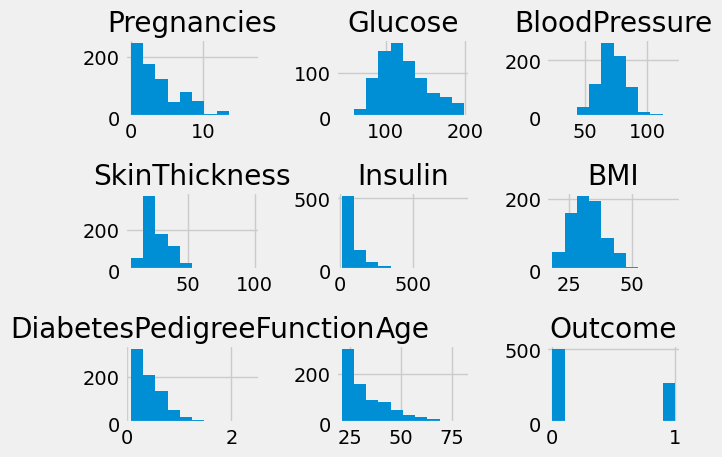

In [18]:
histograms(df)

In [19]:
def barchart(data, feature):
    print("Barchart of Categoricals")
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(data)), (x.mean(),y), ha='center' , va='bottom')                                  
    plt.show()

Barchart of Categoricals


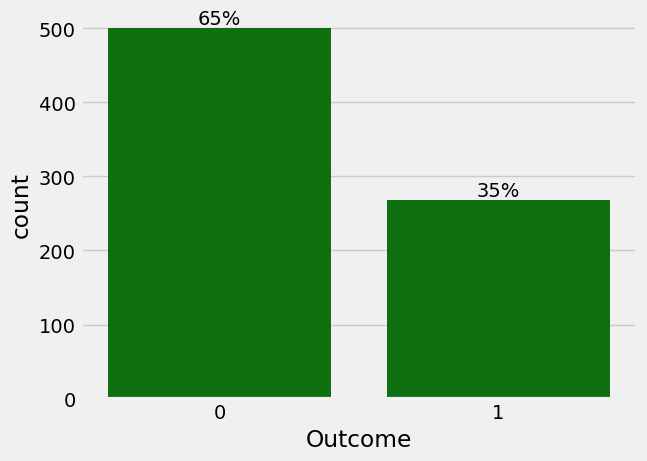

In [20]:
barchart(data=df, feature='Outcome')

**Observations**
Outcome variable is highly imbalanced. We need to solve for data imbalance 

In [21]:
def boxpolot_histplot(data, feature, figsize=(12,7), bins=None):
    print("Univariates of ", feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={'height_ratios':(0.25,0.75)},
    figsize=figsize)
    
    sns.boxplot(data=data,x=feature, showmeans=True, ax=ax_box, color='violet')
    
    sns.histplot(data=data, x=feature, bins=bins, ax=ax_hist, pallete='winter') if bins else\
         sns.histplot(data=data,x=feature, ax=ax_hist)
    plt.axvline(data[feature].mean(),linestyle='--', color='green')
    plt.axvline(data[feature].median(), linestyle='-', color='black')
    plt.show()
    
    
    

Univariates of  Pregnancies


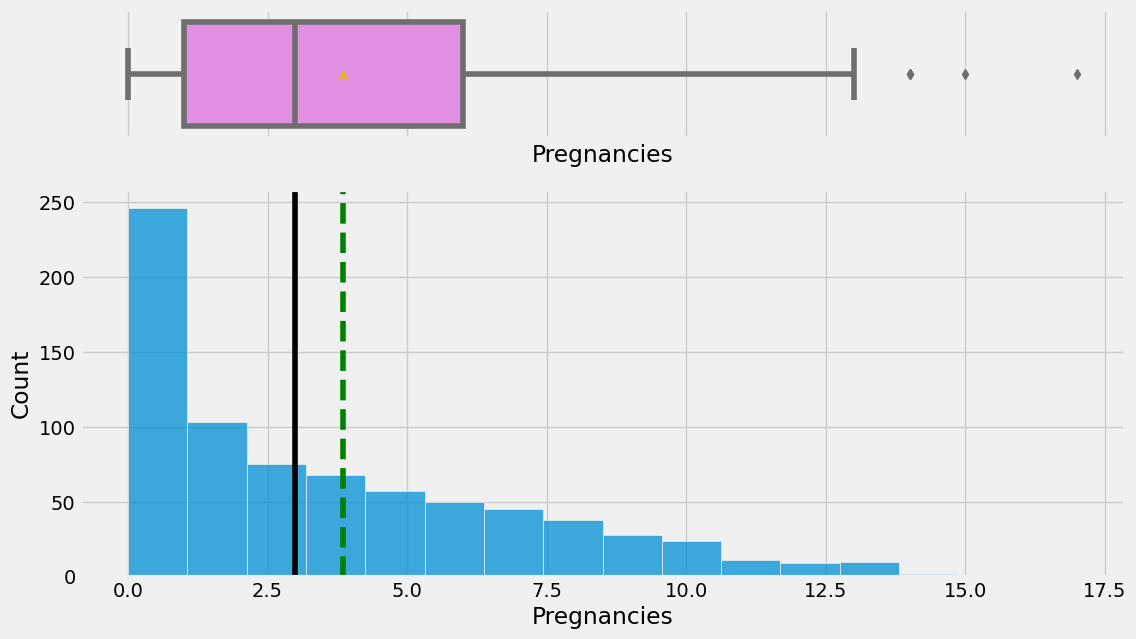

Univariates of  Glucose


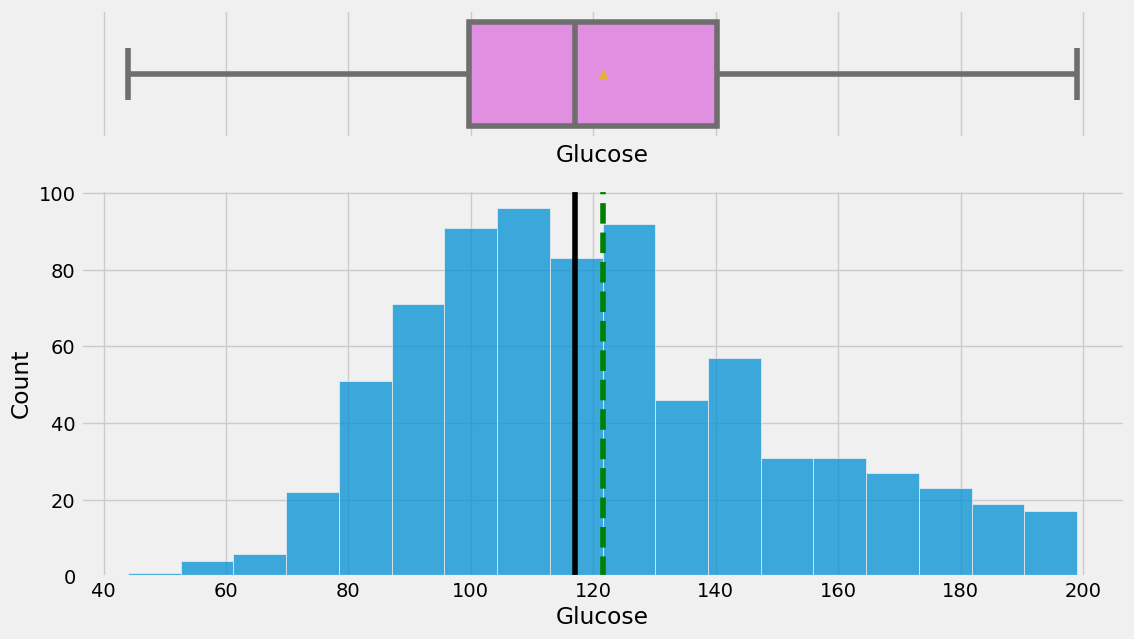

Univariates of  BloodPressure


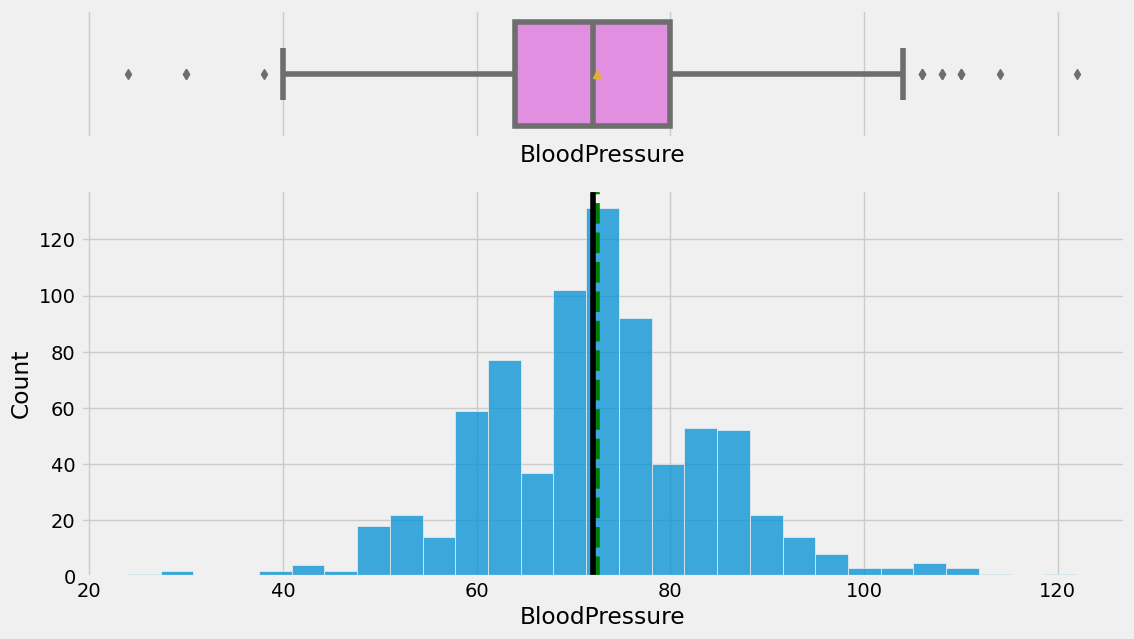

Univariates of  SkinThickness


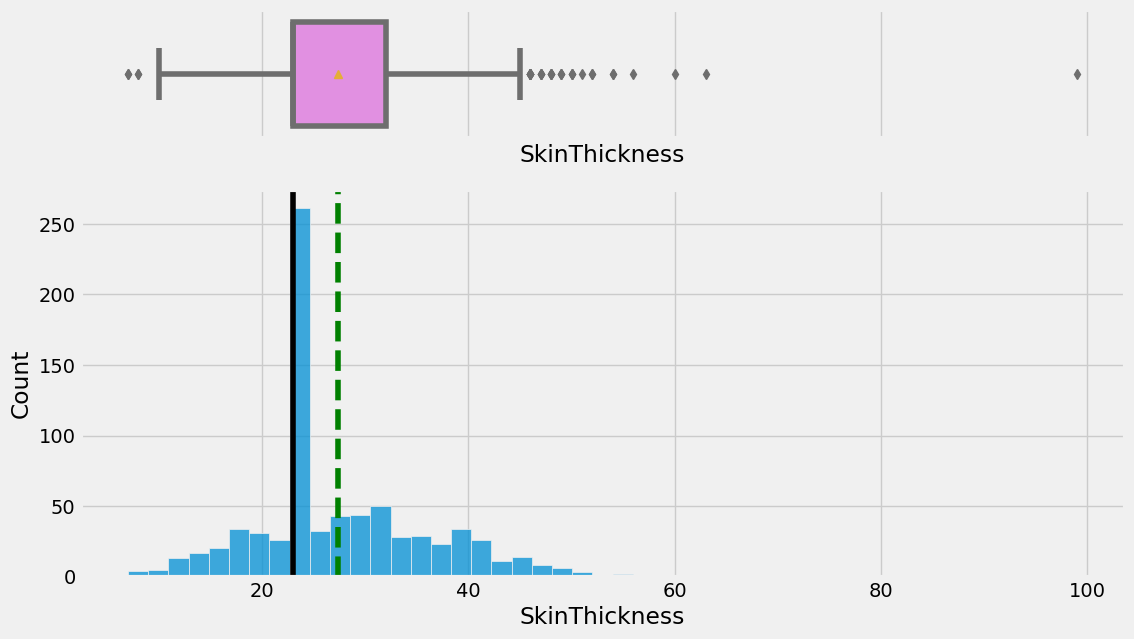

Univariates of  Insulin


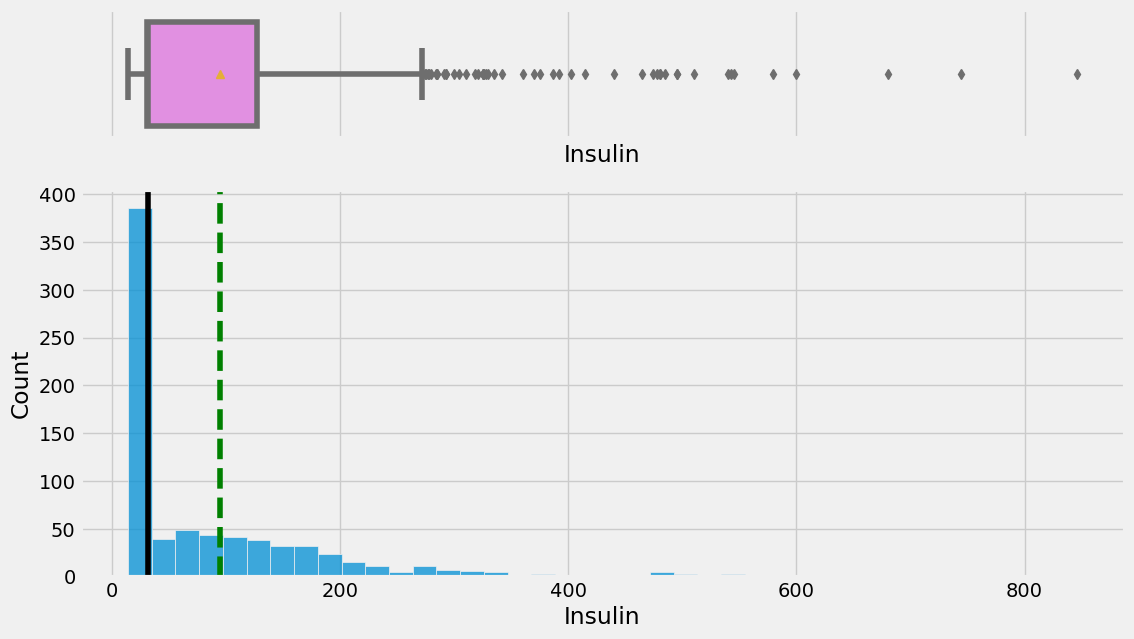

Univariates of  BMI


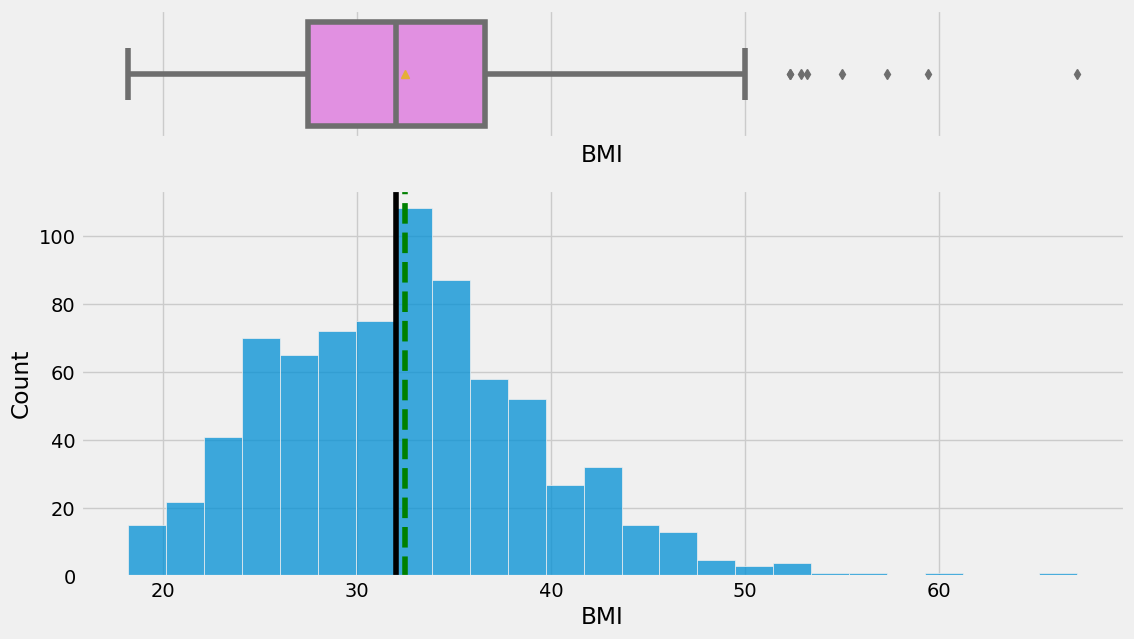

Univariates of  DiabetesPedigreeFunction


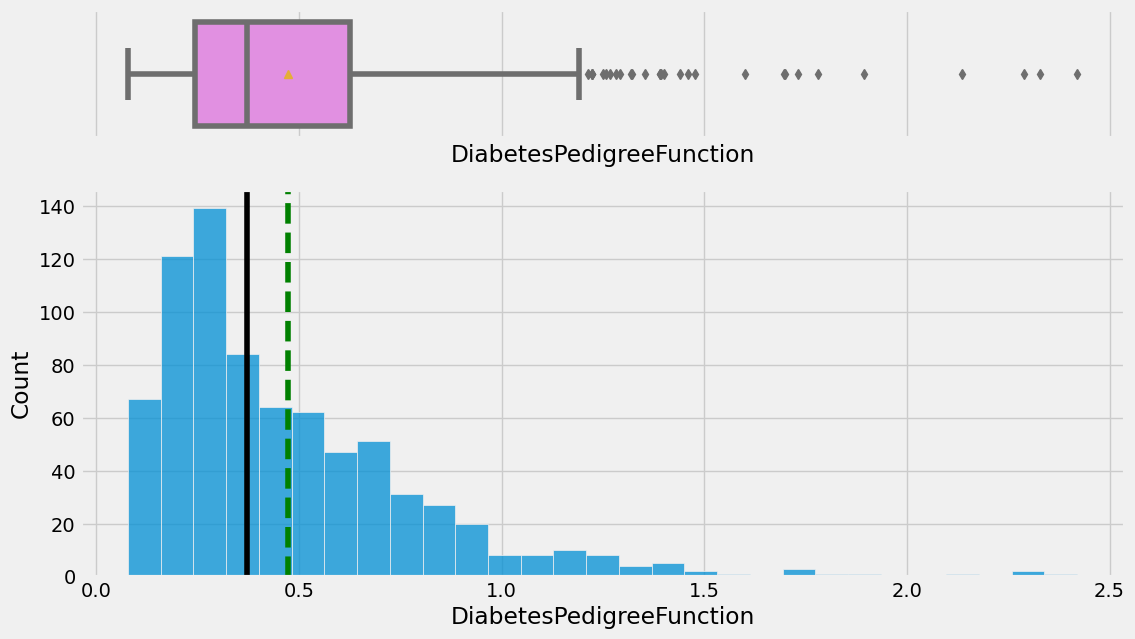

Univariates of  Age


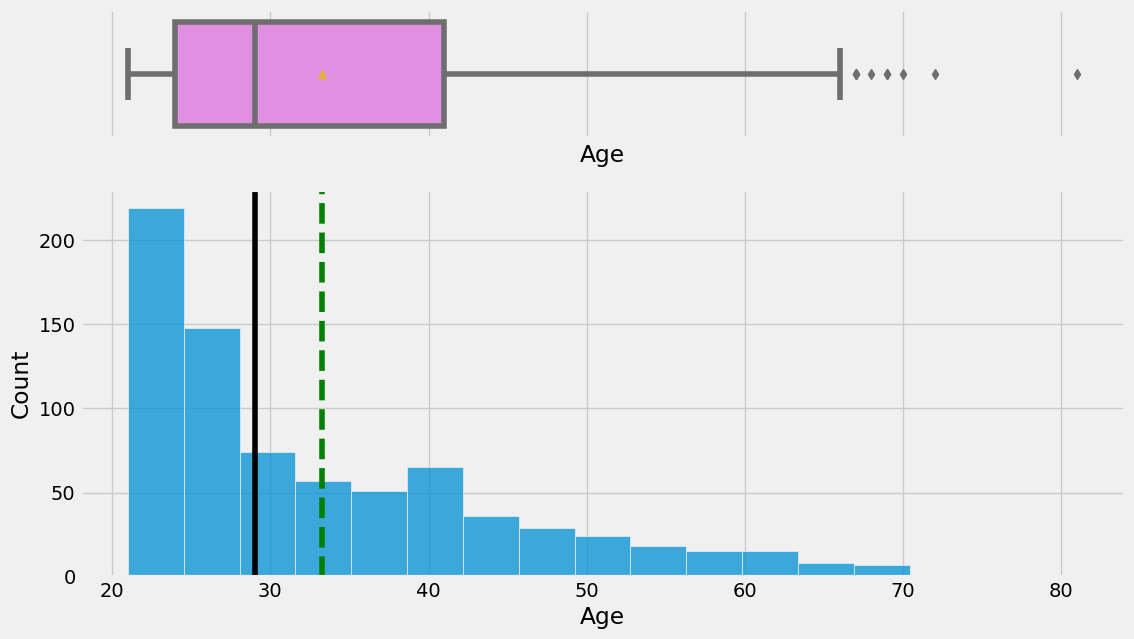

Univariates of  Outcome


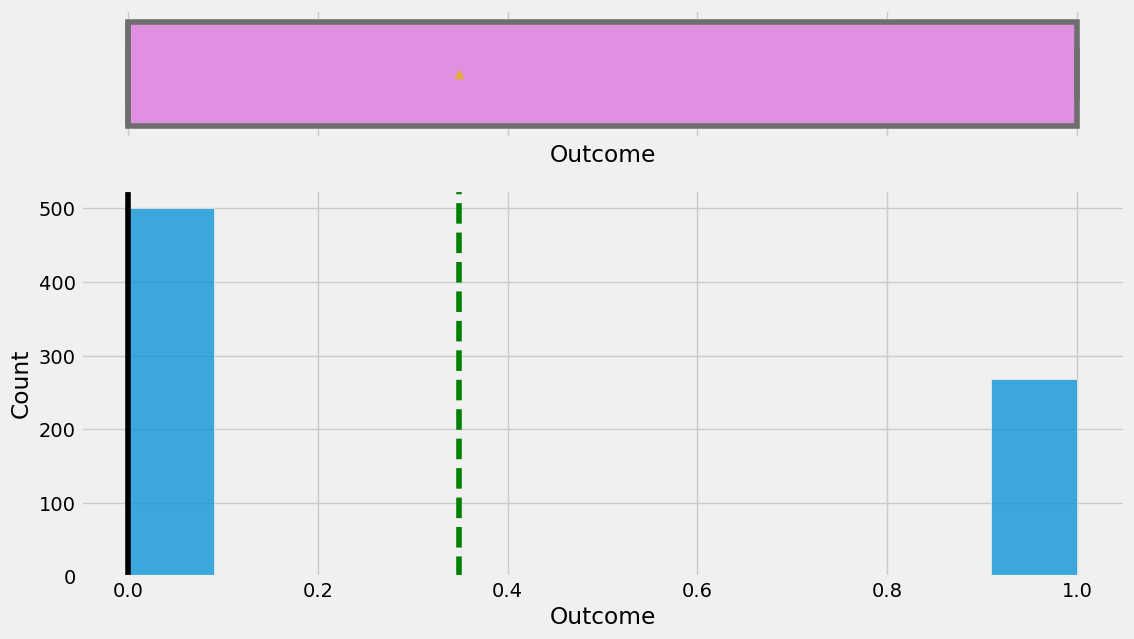

In [22]:
for col in df.select_dtypes(exclude='O').columns:
    boxpolot_histplot(data=df, feature=col)

**Observations**
1. Pregnancies has some suspect outliers which have to be looked upon
2. Skin thickness also has some suspect outliers which need to be taken care of 
3. Insulin is highly right skewed aand may need to be engineered
4. Diabetes pedigree function is also highly right skewed and needs to be engineered.
5. Outcome is highly imbalanced and may need balancing.

##### BIVARIATES-NUMERICAL vs CATEGORICAL

In [23]:
def catnums(data, feature1, feature2):
    print("Bivariate Barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar',color='orange')
    plt.show()

Bivariate Barchart between Outcome and Pregnancies


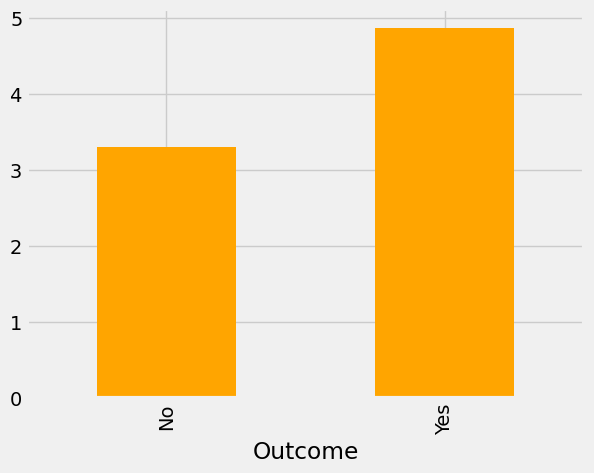

Bivariate Barchart between Outcome and Glucose


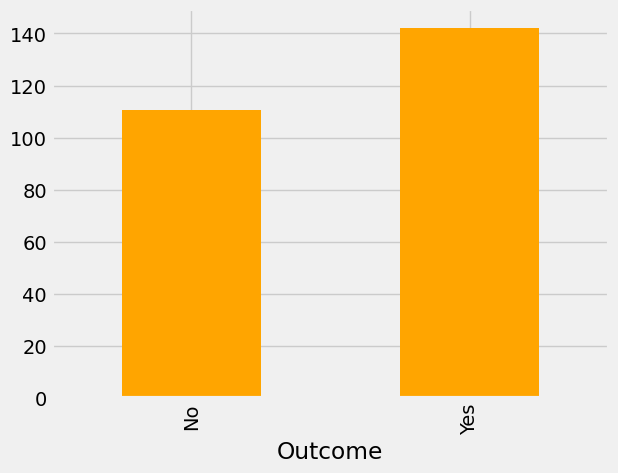

Bivariate Barchart between Outcome and BloodPressure


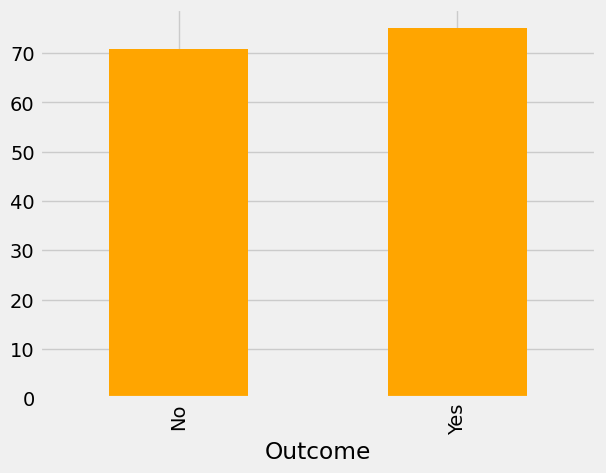

Bivariate Barchart between Outcome and SkinThickness


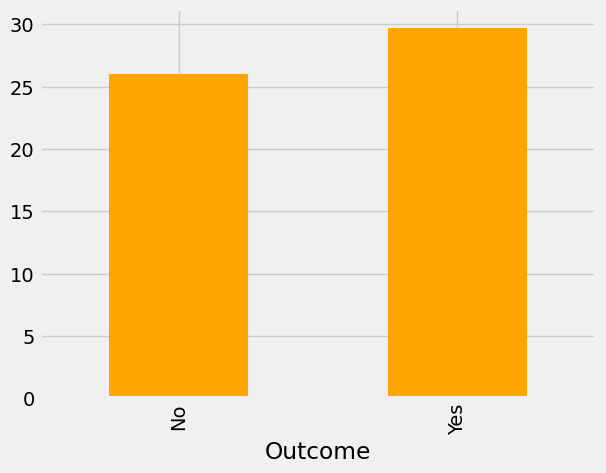

Bivariate Barchart between Outcome and Insulin


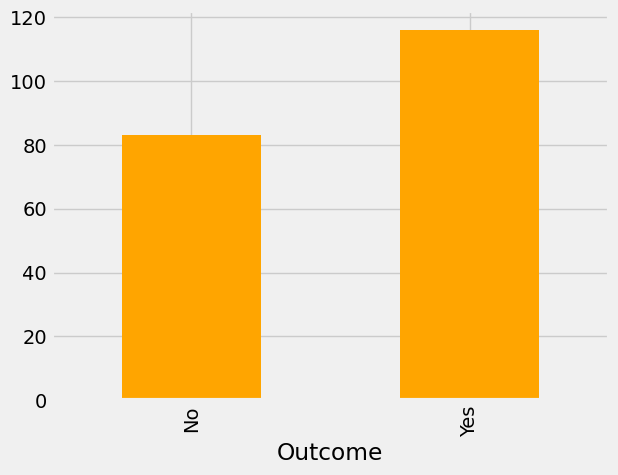

Bivariate Barchart between Outcome and BMI


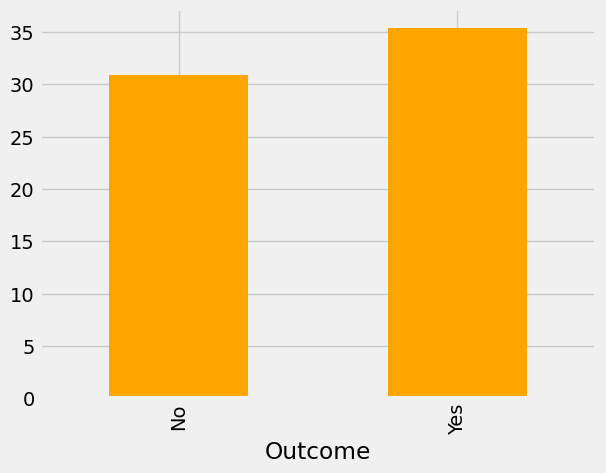

Bivariate Barchart between Outcome and DiabetesPedigreeFunction


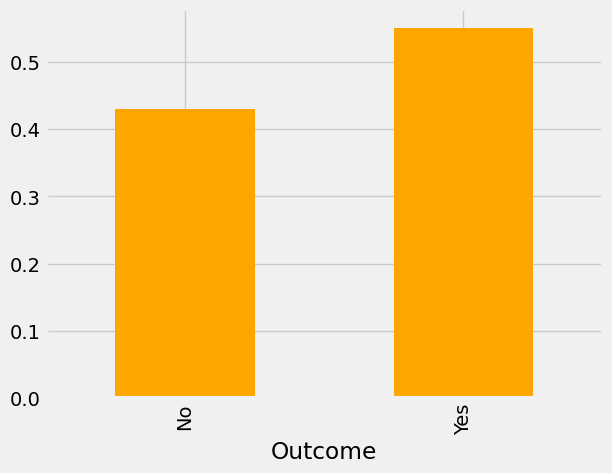

Bivariate Barchart between Outcome and Age


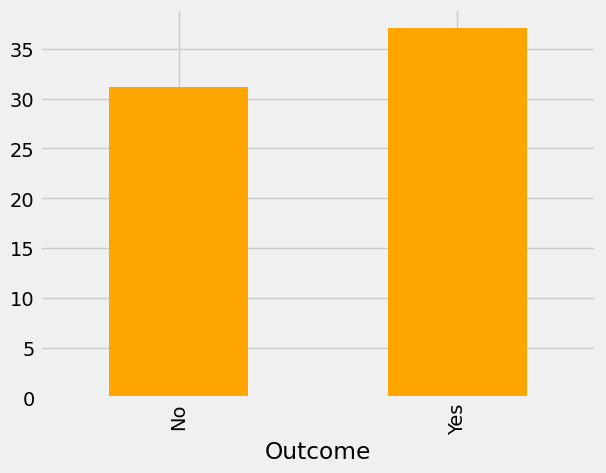

In [24]:
for col in data.select_dtypes(exclude='O').columns:
    catnums(data=data, feature1='Outcome', feature2=col)

**Observations**
Woman with higher pregnancies, higher diabetes predigree functions and Insulin use are more likely to be diabetic

##### BIVARIATES-NUMERICAL vs NUMERICAL

In [25]:
def lineplot_scatterplot(data, feature1, feature2):
    print("Bivariates between {0} and {1}".format(feature1, feature2))
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='blue')
    plt.show()

Bivariates between Pregnancies and Pregnancies


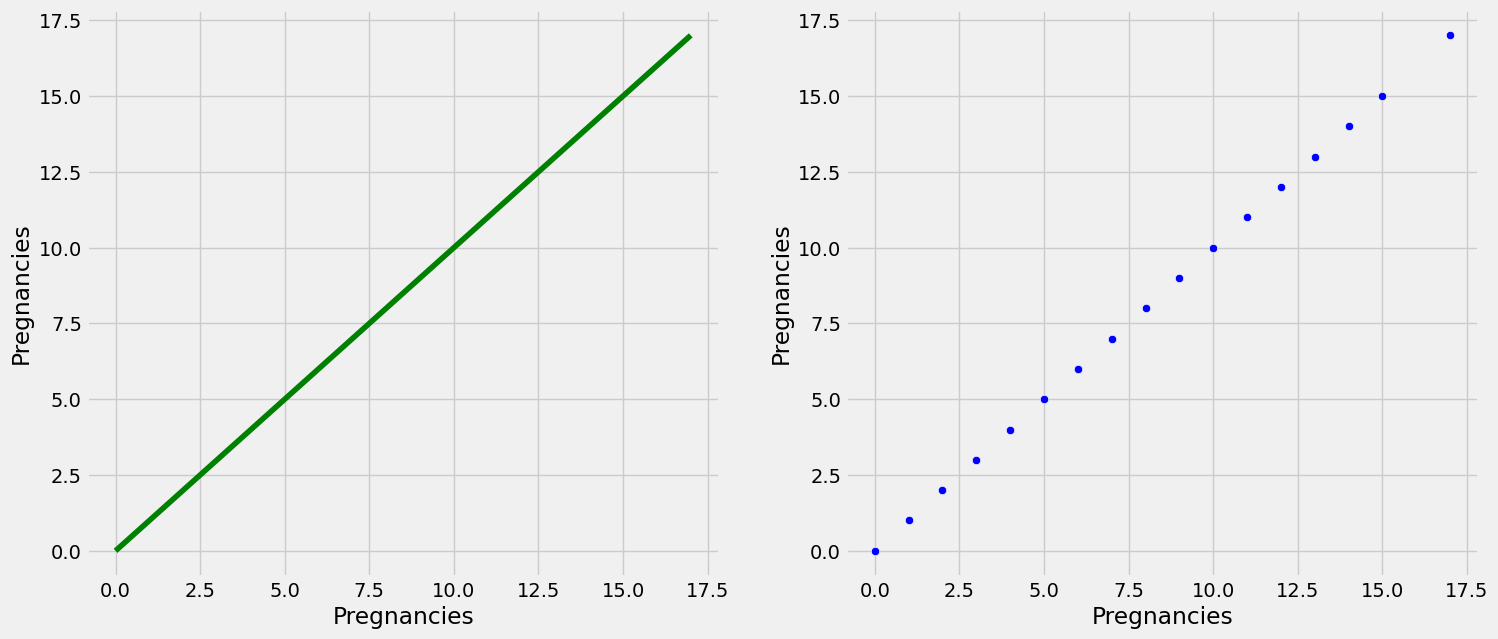

Bivariates between Pregnancies and Glucose


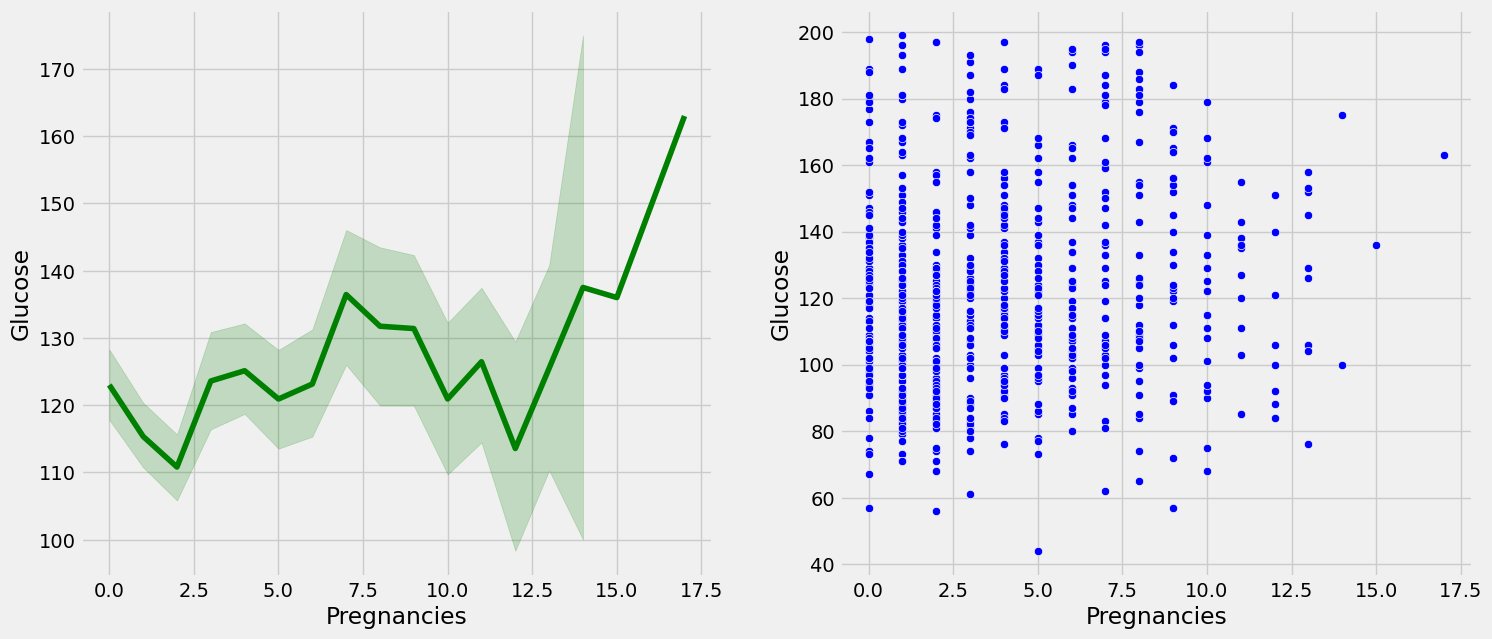

Bivariates between Pregnancies and BloodPressure


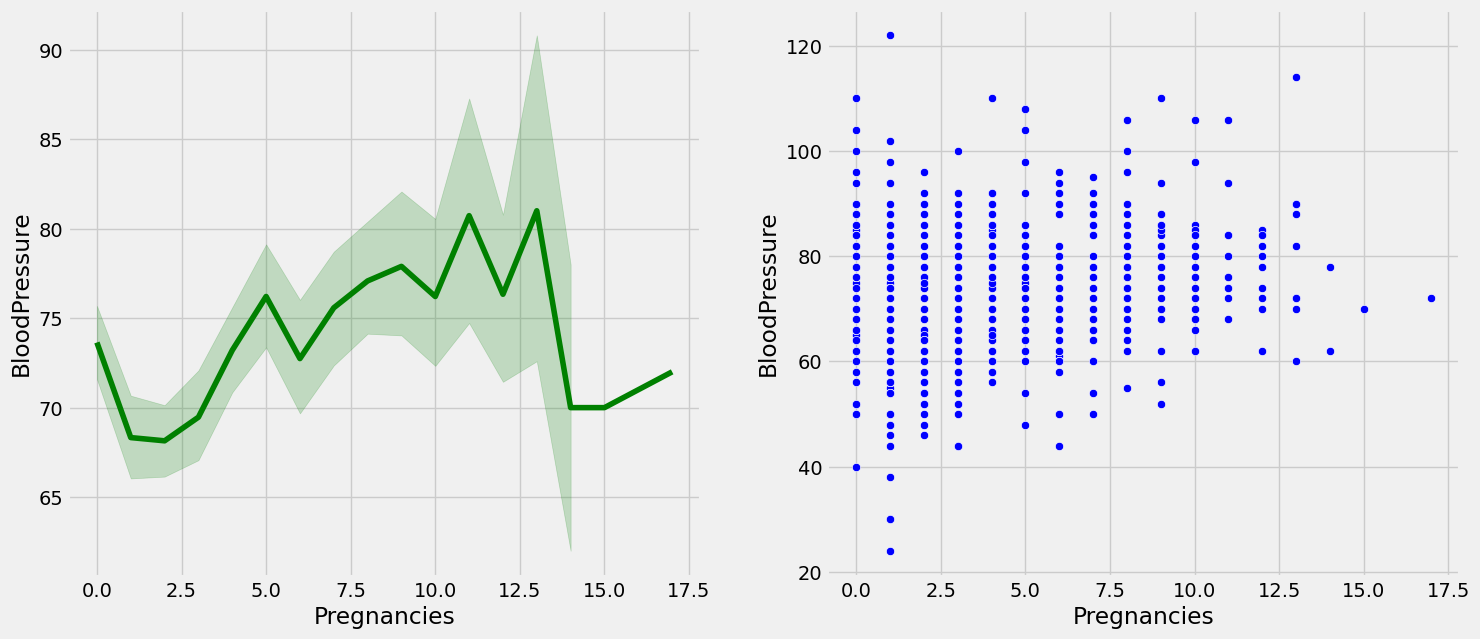

Bivariates between Pregnancies and SkinThickness


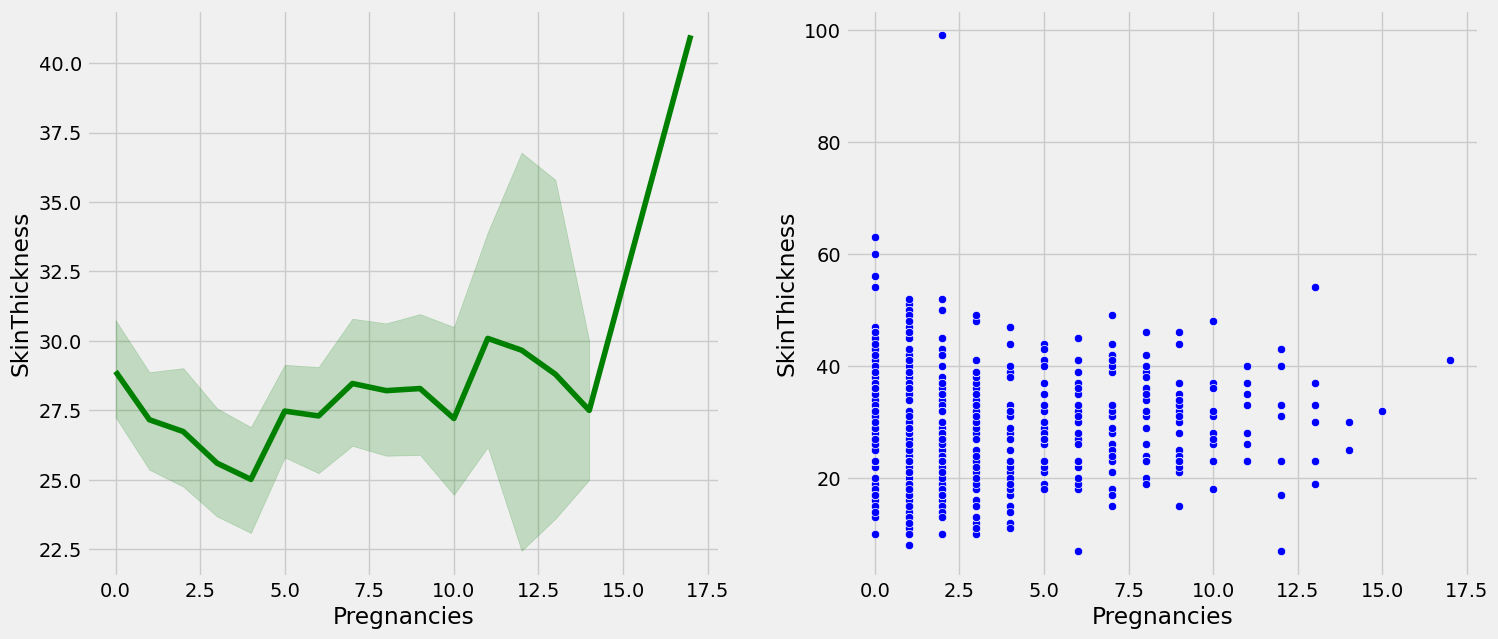

Bivariates between Pregnancies and Insulin


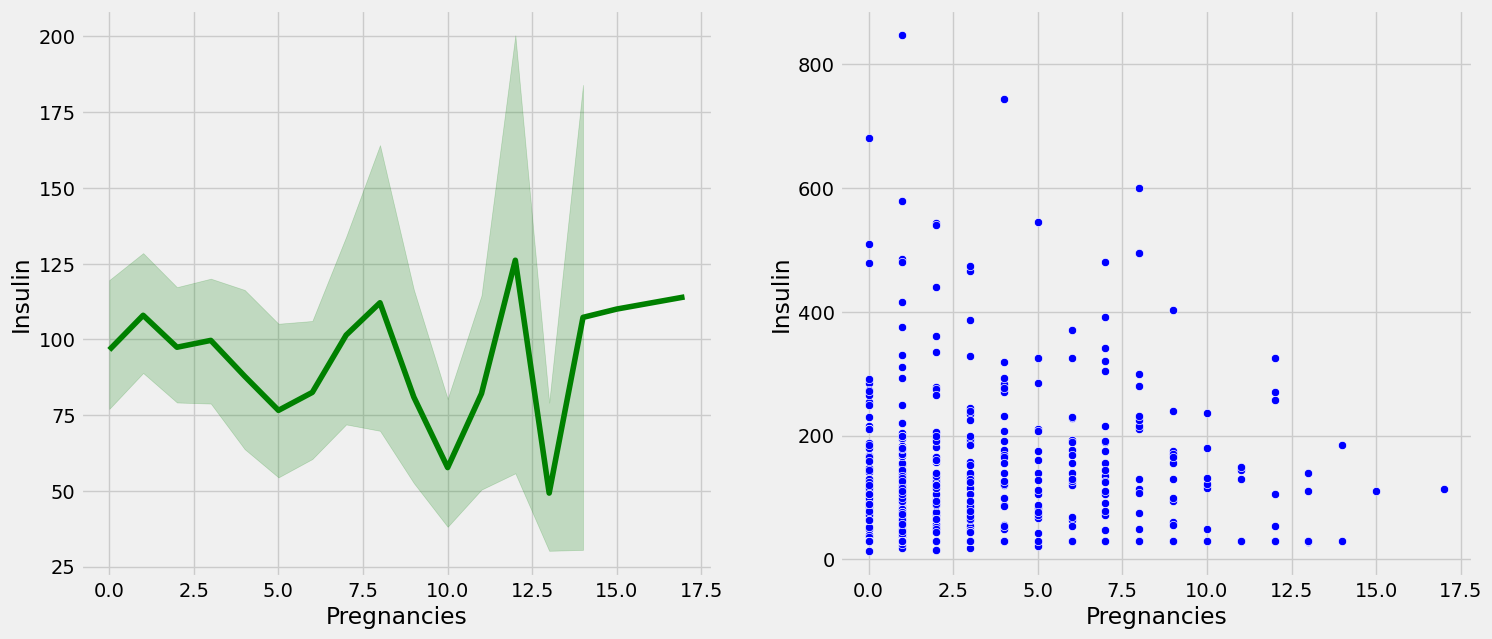

Bivariates between Pregnancies and BMI


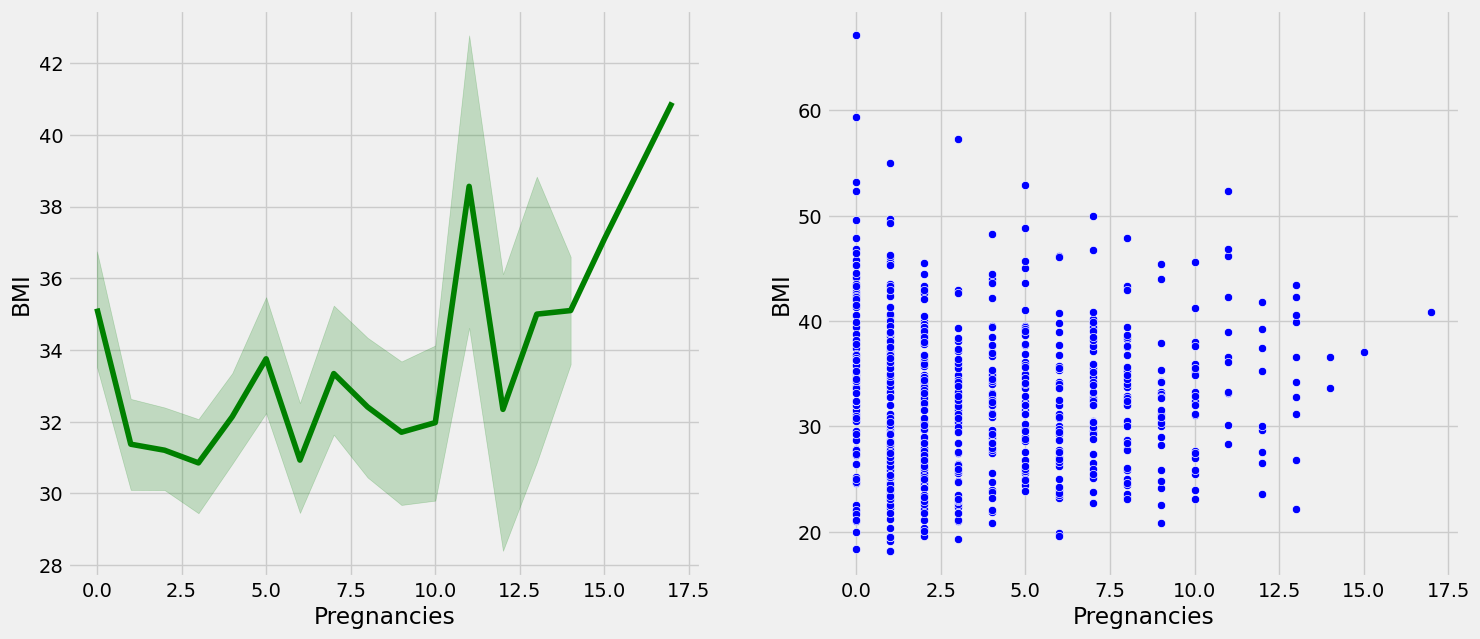

Bivariates between Pregnancies and DiabetesPedigreeFunction


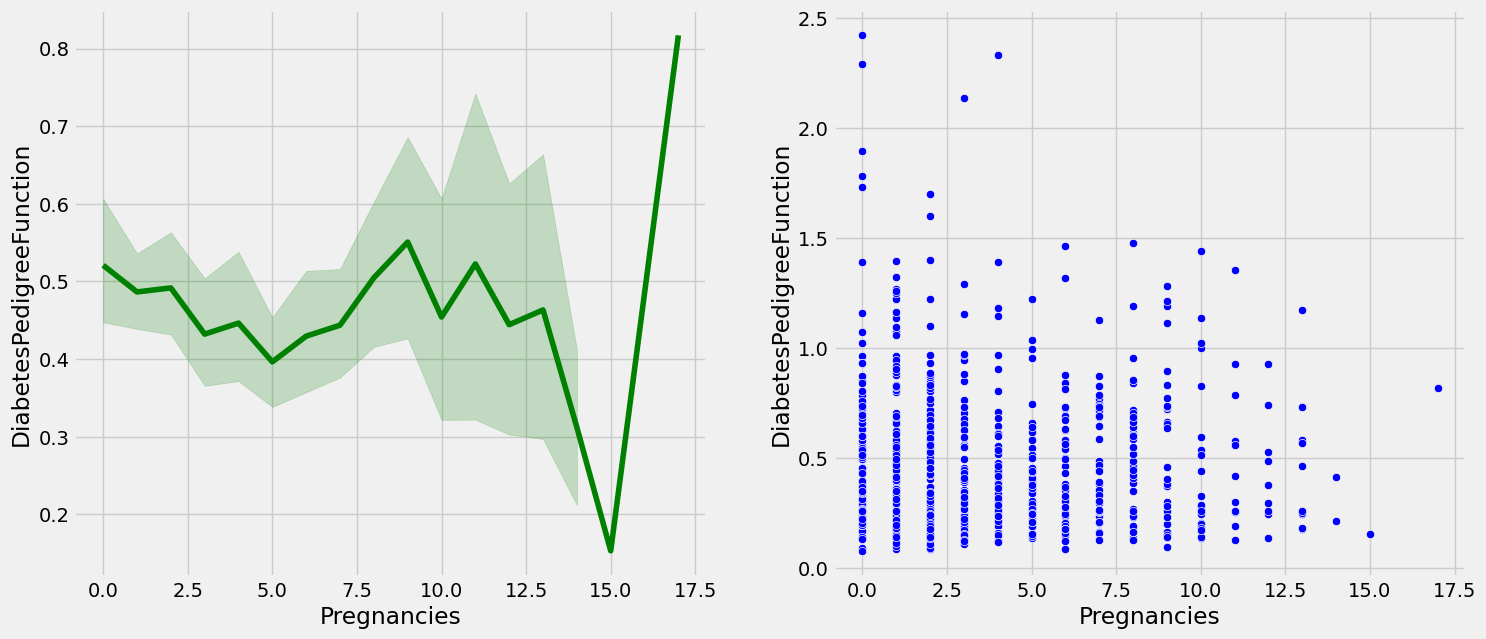

Bivariates between Pregnancies and Age


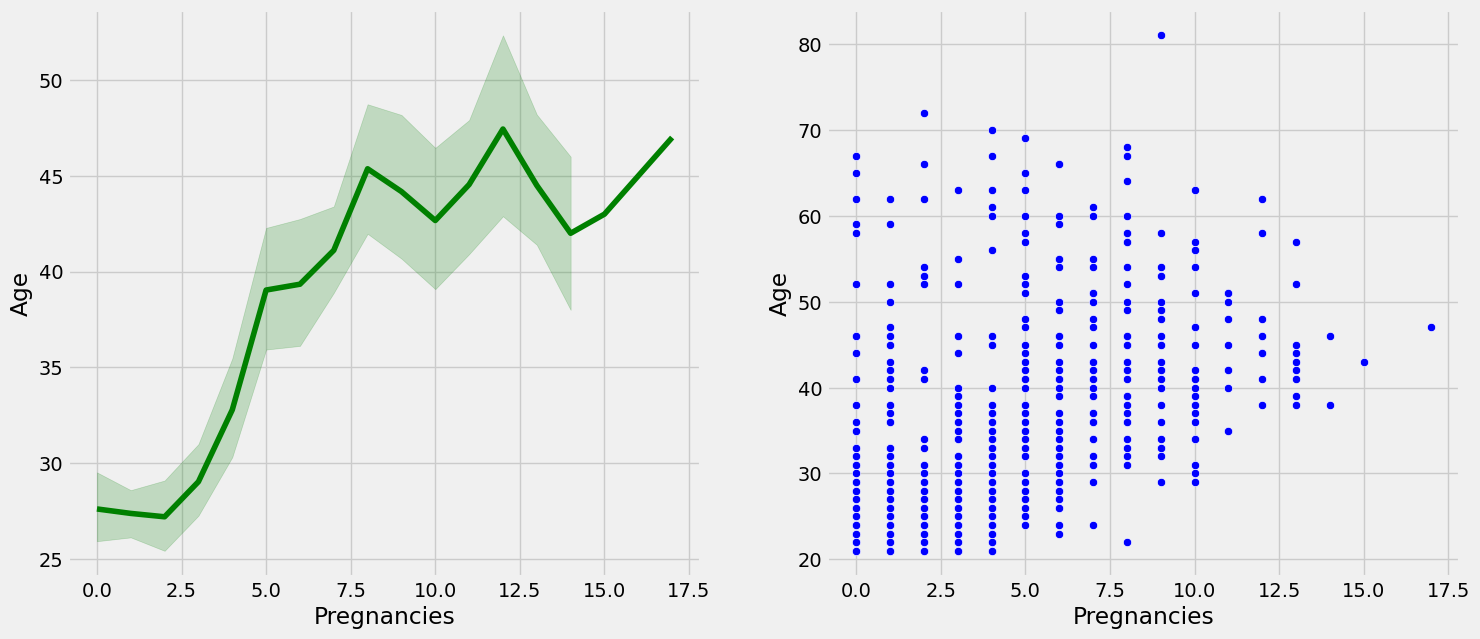

In [26]:
for col in data.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=data, feature1='Pregnancies', feature2=col)
    
    

##### MULTIVARIATE CHARTS

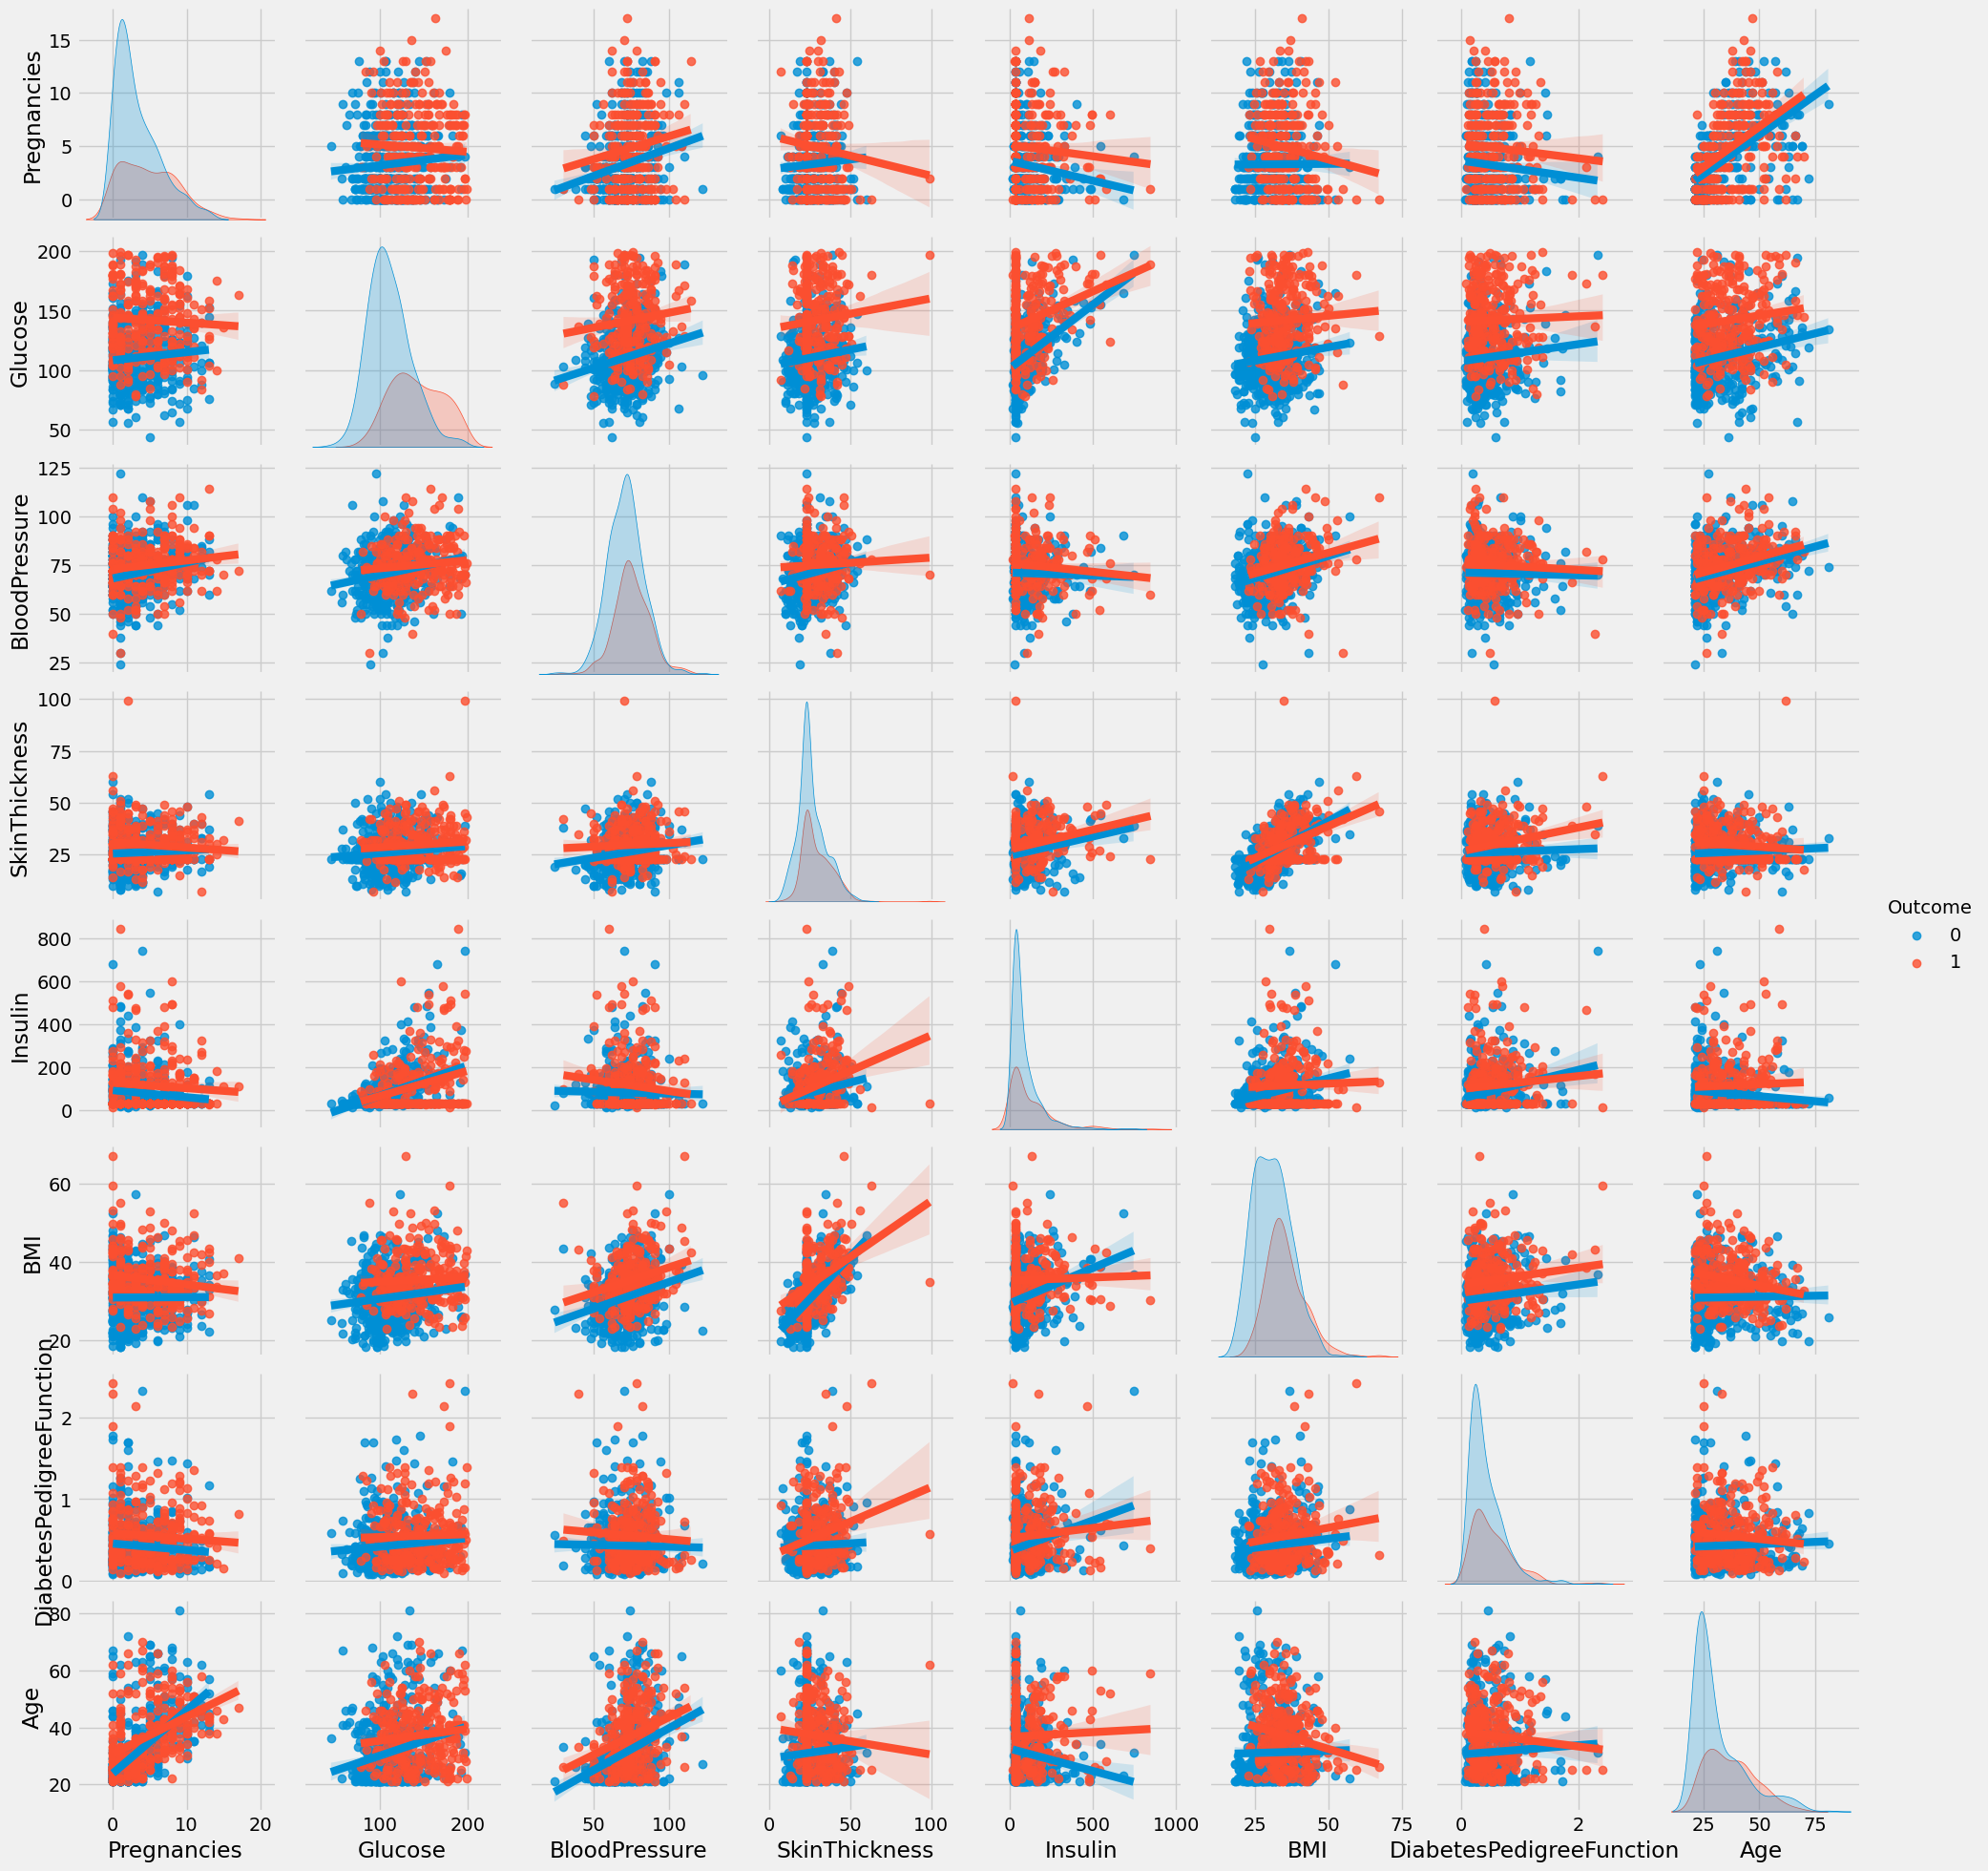

In [27]:
sns.pairplot(data=df, hue='Outcome', kind='reg')

##### Correlations and Heatmaps

In [28]:
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

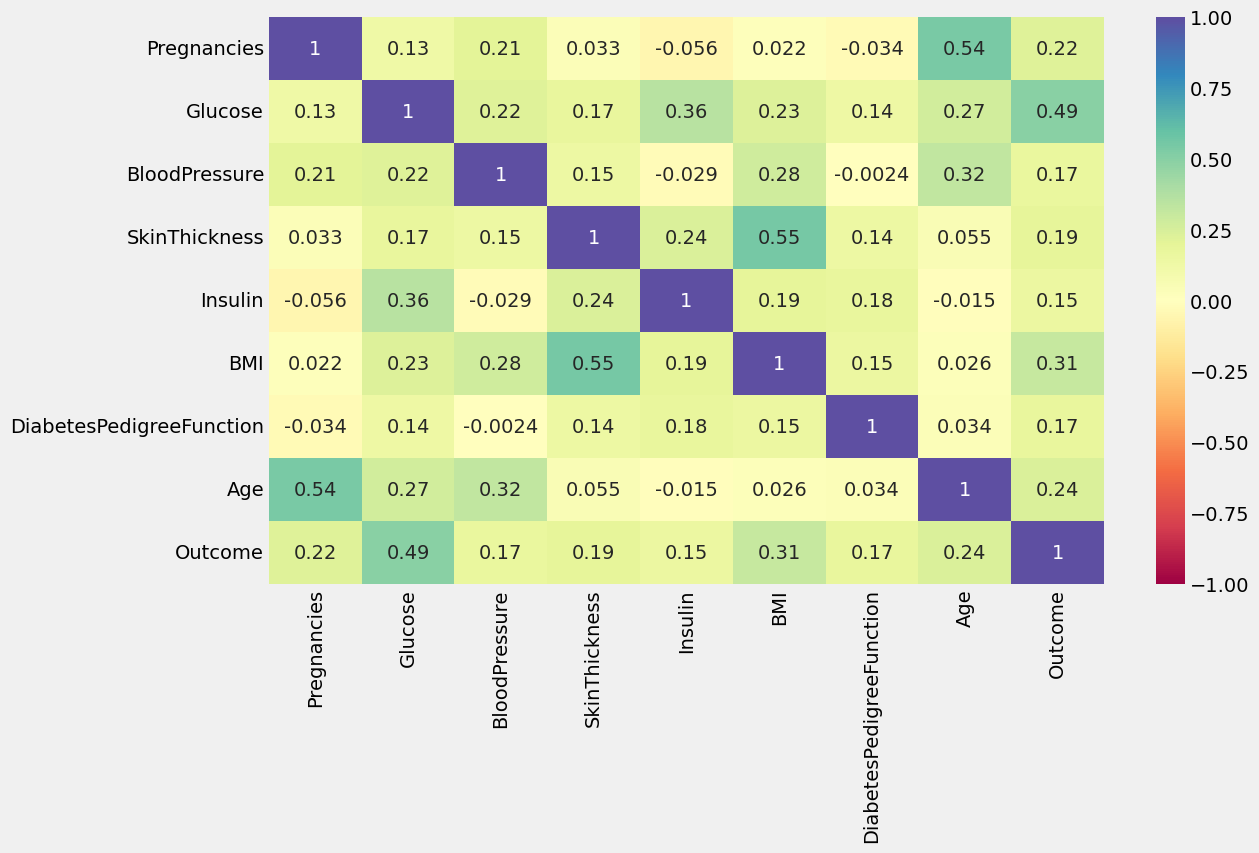

In [29]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmax=+1, vmin=-1)

**Observations**
Glucose and BMI seem to be strongest predictors of Diabetes

In [30]:
%%writefile eda.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import streamlit as st
st.set_option('deprecation.showPyplotGlobalUse', False)
st.title("The EDA Page")

def main():
    st.sidebar.subheader("Please choose the plot")
    data=pd.read_csv('data.csv')
    # drop the redundant column
    data=data.drop('Unnamed: 0', axis=1)
    # treat the nulls
    zerofiller=lambda x: x.replace(0, x.median())
    cols=data.columns[1:6]
    data[cols]=data[cols].apply(zerofiller, axis=0)
    #encode categoricals
    df=data.copy()
    d={'Yes':1, 'No':0}
    df['Outcome']=df['Outcome'].map(d)
    
    def histograms(data):
        st.subheader('Univariate Histogram')
        data.hist()
        plt.tight_layout()
        st.pyplot()
    def barchart(data, feature):
        st.subheader("Barchart of Categoricals")
        ax=sns.countplot(data=data, x=feature, color='green')
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate("{:.2g}%".format(100.*y/len(data)), (x.mean(),y), ha='center' , va='bottom')                                  
        st.pyplot()
        
    def heatmap(data):
        st.subheader("The Heatmap")
        plt.figure(figsize=(12,7))
        sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmax=+1, vmin=-1)
        st.pyplot()
        
    plot=st.sidebar.selectbox('Choose Plot',('Histograms', 'Barchart', 'Heatmap'))
    if st.sidebar.button("PLOT"):
        if plot=='Histograms':
            histograms(df)
        if plot=='Barchart':
            barchart(data=df, feature='Outcome')
        if plot=='Heatmap':
            heatmap(data=df)
        
if __name__=='__main__':
    main()
        
        

    
    
    

Overwriting eda.py


# Step 4
seperate feature and lables


In [41]:
#create a function for preprocessing
def preprocess(df,label):
    X=df.drop(label,axis=1)
    y=df[label]
    from imblearn.over_sampling import SMOTE
    sm=SMOTE()
    X,y=sm.fit_resample(X,y)
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=69)
    return x_train,x_test,y_train,y_test

In [44]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [43]:
x_train,x_test,y_train,y_test=preprocess(df,'Outcome')

In [45]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [46]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(700, 8) (700,) (300, 8) (300,)


data ready for modelling

## Fit and Evaluate various models

In [47]:
#function to print metrics
def print_metrics(y_test,y_pred,model):
    print("metrics for the model",model)
    print(" ")
    print('accuracy score',accuracy_score(y_test,y_pred))
    print(" ")
    print("recall score",recall_score(y_test,y_pred))
    print(" ")
    print("precision score",precision_score(y_test,y_pred))
    print(" ")
    print("F1 score",f1_score(y_test,y_pred))
    print(" ")
    print("roc score",roc_auc_score(y_test,y_pred))
    print(" ")
    print("confuion matrix",confusion_matrix(y_test,y_pred))
    print("classification report")
    print(classification_report(y_test,y_pred))
    

In [ ]:
from sklearn.neighbors import K

In [74]:
def plot_metrics(clf,x_test,y_test,model):
    print("metric plots for the model",model)
    plot_confusion_matrix(clf,x_test,y_test,labels=[0,1])
    print(" ")
    plot_roc_curve(clf,x_test,y_test)
    print(" ")
    plot_precision_recall_curve(clf,x_test,y_test)

In [58]:
# create and fit KNN MODEL
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test,y_pred,"KNN")

metrics for the model KNN
 
accuracy score 0.7633333333333333
 
recall score 0.8269230769230769
 
precision score 0.7456647398843931
 
F1 score 0.7841945288753799
 
roc score 0.7606837606837606
 
confuion matrix [[100  44]
 [ 27 129]]
classification report
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       144
           1       0.75      0.83      0.78       156

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



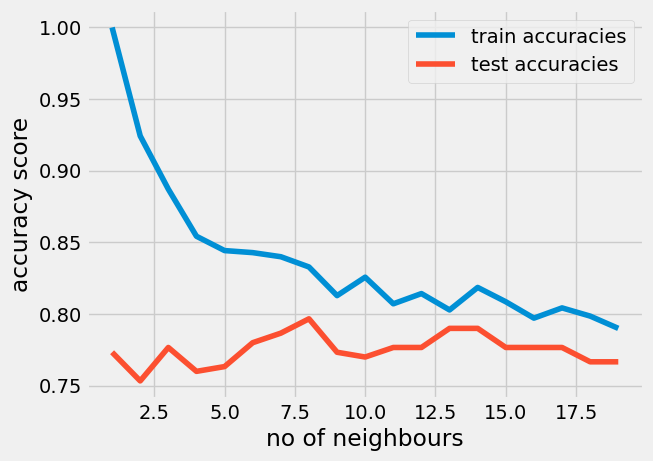

In [56]:
#lets try to optimise the KNN using a model complexity curve
neighbors=np.arange(1,20)
train_accuracies=np.empty(len(neighbors))
test_accuracies=np.empty(len(neighbors))

#enumerate along the neighbours
for i,k in enumerate (neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracies[i]=knn.score(x_train,y_train)
    test_accuracies[i]=knn.score(x_test,y_test)
#plot the model complexity curve
plt.plot(neighbors,train_accuracies,label="train accuracies")
plt.plot(neighbors,test_accuracies,label="test accuracies")
plt.legend()
plt.xlabel("no of neighbours")
plt.ylabel("accuracy score")
plt.show()

In [57]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test,y_pred,"KNN")

metrics for the model KNN
 
accuracy score 0.79
 
recall score 0.8525641025641025
 
precision score 0.7687861271676301
 
F1 score 0.8085106382978723
 
roc score 0.7873931623931625
 
confuion matrix [[104  40]
 [ 23 133]]
classification report
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       144
           1       0.77      0.85      0.81       156

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [61]:
#lets select the best model based on f1-score and optimize it
clf={
    'KNN':KNeighborsClassifier(),
    "NB":GaussianNB(),
    "Logregs":LogisticRegression(),
    "descison tree":DecisionTreeClassifier(),
    "random forest":RandomForestClassifier(),
    "adaboost":AdaBoostClassifier(),
    "gradient boost":GradientBoostingClassifier(),
    'xgboost':XGBClassifier(),
    "svm": SVC()
}

model_reports=pd.DataFrame(columns=['model','accuracy','precision','recall','f1 score'])
for clf,clf_name in zip(clf.values(),clf.keys()):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print("fitting the model...",clf_name)
    t={"model":clf_name,
       "accuracy":accuracy_score(y_test,y_pred),
       "precision":precision_score(y_test,y_pred),
       'recall':recall_score(y_test,y_pred),
       "f1 score":f1_score(y_test,y_pred)}
    model_reports=model_reports.append(t,ignore_index=True)
model_reports.sort_values(by='f1 score',ascending=False,inplace=True)
model_reports

fitting the model... KNN
fitting the model... NB
fitting the model... Logregs
fitting the model... descison tree
fitting the model... random forest
fitting the model... adaboost
fitting the model... gradient boost
fitting the model... xgboost
fitting the model... svm


model  accuracy  precision    recall  f1 score
4   random forest  0.810000   0.803681  0.839744  0.821317
7         xgboost  0.780000   0.767857  0.826923  0.796296
6  gradient boost  0.783333   0.782609  0.807692  0.794953
0             KNN  0.763333   0.745665  0.826923  0.784195
8             svm  0.766667   0.772152  0.782051  0.777070
3   descison tree  0.770000   0.784314  0.769231  0.776699
5        adaboost  0.763333   0.774194  0.769231  0.771704
2         Logregs  0.720000   0.753521  0.685897  0.718121
1              NB  0.683333   0.736434  0.608974  0.666667

In [63]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred=rfc.predict(x_test)
print_metrics(y_test,y_pred,"RFC")

metrics for the model RFC
 
accuracy score 0.7666666666666667
 
recall score 0.782051282051282
 
precision score 0.7721518987341772
 
F1 score 0.7770700636942675
 
roc score 0.766025641025641
 
confuion matrix [[108  36]
 [ 34 122]]
classification report
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       144
           1       0.77      0.78      0.78       156

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [66]:
param_grid={
    'n_estimators':[100,150,200,250],
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,20,2),
    'max_depth':[2,4,'auto'],
    'max_features':['sqrt','log2'],
    "criterion":['gini','entropy']
}
n_folds=5
cv=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=n_folds,n_jobs=1,
                verbose=3,return_train_score=False)
cv.fit(x_train,y_train)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.779 total time=   0.1s
[CV 2/5] END criterion

[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.743 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_sam

[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=0.771 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.729 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.757 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, m

[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.736 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.729 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.750 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, m

[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.750 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_sam

[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.764 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.757 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.750 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, m

[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.736 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=200;, score=0.750 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, m

[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=250;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.750 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_sam

[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_sam

[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.764 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.721 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, m

[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_sam

[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.757 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_sam

[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.793 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, m

[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=100;, score=0.757 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=100;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.757 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, m

[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, m

[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.793 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=200;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, m

[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=250;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.743 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_sam

[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=200;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=200;, score=0.736 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.757 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_sam

[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.750 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.764 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, m

[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_sam

[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_sam

[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, m

[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=100;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=100;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.750 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=7, m

[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.771 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.743 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_sam

[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.750 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.757 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=250;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=250;, score=0.793 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, m

[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.743 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=200;, score=0.729 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, m

[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=250;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.736 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.757 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_sam

[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.771 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_sam

[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.764 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=9, m

[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.736 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.743 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_sam

[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_sam

[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, m

[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.757 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.736 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, m

[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.771 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_sam

[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, m

[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, m

[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.736 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_sam

[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.757 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.757 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.793 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_sam

[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, m

[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.736 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_sam

[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.764 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.793 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.793 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.743 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_sam

[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, m

[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=100;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=100;, score=0.729 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, m

[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.779 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.729 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_sam

[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.757 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.771 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.771 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, m

[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, m

[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=250;, score=0.729 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.757 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_sam

[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=200;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.786 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.793 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_sam

[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, m

[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.750 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_sam

[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.757 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.764 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_sam

[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=150;, score=0.736 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, m

[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=100;, score=0.729 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, m

[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.793 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.764 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.721 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.743 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_sam

[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.793 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=250;, score=0.786 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=250;, score=0.757 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, m

[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, m

[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=250;, score=0.757 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_sam

[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.786 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.800 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.764 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_sam

[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.736 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.750 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, m

[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_sam

[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.764 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.814 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.793 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_sam

[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=0.736 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, m

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, m

[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.800 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.764 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.750 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.814 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_sam

[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.757 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, m

[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.764 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=200;, score=0.750 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, m

[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_sam

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.736 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.800 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_sam

[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.800 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, m

[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_sam

[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.793 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_sam

[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=150;, score=0.771 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.800 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, m

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=100;, score=0.771 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.800 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, m

[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.807 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.757 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.807 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.786 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.793 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, m

[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.814 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, m

[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=250;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.793 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.736 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_sam

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=200;, score=0.800 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.743 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_sam

[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, m

[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_sam

[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.793 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_sam

[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, m

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=100;, score=0.800 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=100;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=7, m

[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.779 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_sam

[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=250;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=250;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, m

[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=200;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, m

[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=250;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_sam

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.793 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_sam

[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.793 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=9, m

[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.800 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_sam

[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.807 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.757 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_sam

[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, m

[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.807 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, m

[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.814 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.764 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.786 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.821 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_sam

[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.771 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, m

[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=200;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, m

[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=250;, score=0.736 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_sam

[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.793 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.764 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.800 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_sam

[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.807 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, m

[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.814 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_sam

[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.764 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.807 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_sam

[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=150;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.793 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, m

[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=100;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=100;, score=0.721 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.743 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, m

[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.793 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.779 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_sam

[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.793 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.779 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.800 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, m

[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, m

[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100;, score=0.736 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_sam

[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=200;, score=0.793 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.793 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.764 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.793 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_sam

[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=150;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, m

[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_sam

[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.800 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.793 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.757 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_sam

[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=150;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.750 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.793 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.793 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, m

[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=100;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=100;, score=0.764 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.814 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, m

[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.800 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_sam

[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.800 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.800 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=250;, score=0.807 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=250;, score=0.786 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, m

[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.750 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=8, m

[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=250;, score=0.743 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.814 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_sam

[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.786 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.793 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_sam

[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.807 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.793 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=9, m

[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1

[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1

[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2

[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3

[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4

[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4

[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5

[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5

[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6

[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7

[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8

[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8

[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9

[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9

[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=sqrt, min_samples_

[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2

[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3

[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7

[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7

[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8

[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_lea

[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9

[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=auto, max_features=log2, min_samples_

[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=250;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.750 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.764 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=150;, score=0.729 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=150;, score=0.800 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=150;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=150;, score=0.764 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=200;, score=0.743 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.757 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.793 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.757 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=150;, score=0.736 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=150;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=150;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=150;, score=0.757 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=18, n_estimators=250;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=18, n_estimators=250;, score=0.771 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.757 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.729 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=250;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=150;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=150;, score=0.764 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=250;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=250;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=18, n_estimators=100;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=18, n_estimators=100;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=18, n_estimators=100;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=18, n_estimators=100;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.771 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=250;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=250;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.764 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.736 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=250;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=100;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=100;, score=0.786 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=100;, score=0.743 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=100;, score=0.771 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=250;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=250;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=150;, score=0.743 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=150;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=150;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=150;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=250;, score=0.757 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=250;, score=0.771 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=200;, score=0.757 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=250;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=250;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=150;, score=0.743 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=150;, score=0.807 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=150;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200;, score=0.793 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=250;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=250;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=200;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=200;, score=0.779 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=250;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=250;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=150;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=150;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=150;, score=0.764 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=200;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=250;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, mi

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=200;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=250;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=250;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=150;, score=0.729 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=150;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=150;, score=0.757 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=150;, score=0.736 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=0.750 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=250;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=100;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=100;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=100;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=200;, score=0.800 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=200;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=250;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=250;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=150;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=150;, score=0.764 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=250;, score=0.764 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=250;, score=0.757 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=100;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=100;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=100;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.757 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=250;, score=0.779 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=250;, score=0.757 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=150;, score=0.721 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=150;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=150;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=200;, score=0.793 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.793 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.771 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.793 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=0.743 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=200;, score=0.793 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=250;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.750 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.750 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.721 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=0.757 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=150;, score=0.786 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=150;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=150;, score=0.764 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=150;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=0.736 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=250;, score=0.764 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=250;, score=0.729 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=0.757 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.750 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.764 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.764 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.757 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.750 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=250;, score=0.764 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=250;, score=0.757 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.757 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.764 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=150;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.750 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=250;, score=0.750 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=100;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=100;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=100;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=200;, score=0.764 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=250;, score=0.771 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=18, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=150;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=150;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=150;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=150;, score=0.736 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=0.757 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250;, score=0.729 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.786 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200;, score=0.750 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=250;, score=0.757 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=150;, score=0.750 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=150;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=150;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=150;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.793 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=250;, score=0.736 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=100;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=100;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=100;, score=0.807 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=100;, score=0.757 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, mi

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=250;, score=0.771 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=250;, score=0.757 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.786 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.764 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.757 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=150;, score=0.750 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=200;, score=0.807 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=250;, score=0.736 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100;, score=0.757 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=250;, score=0.764 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=150;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.750 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100;, score=0.750 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=0.736 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=250;, score=0.750 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=150;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=200;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=250;, score=0.764 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=250;, score=0.729 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.743 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.729 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.743 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=150;, score=0.736 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=250;, score=0.757 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.807 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=0.750 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=0.757 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=150;, score=0.743 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=200;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.743 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.786 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.793 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=250;, score=0.757 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=100;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=100;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=100;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=100;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=250;, score=0.750 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.771 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=250;, score=0.779 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100;, score=0.771 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=18, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=18, n_estimators=200;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=18, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=18, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=18, n_estimators=250;, score=0.793 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=18, n_estimators=250;, score=0.786 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=150;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=150;, score=0.757 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.793 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.757 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200;, score=0.800 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200;, score=0.771 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=250;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=250;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=0.800 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=0.807 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=0.764 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200;, score=0.750 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=250;, score=0.757 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, mi

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=0.757 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=250;, score=0.771 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=250;, score=0.793 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=150;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=150;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=150;, score=0.764 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=250;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=250;, score=0.757 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100;, score=0.786 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=250;, score=0.764 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=150;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=150;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=200;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=250;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=250;, score=0.764 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=100;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=100;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=100;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.757 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=250;, score=0.786 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=150;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=150;, score=0.786 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=200;, score=0.743 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=250;, score=0.793 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=250;, score=0.764 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=0.757 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=250;, score=0.814 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=0.779 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=200;, score=0.743 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=250;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=250;, score=0.800 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=150;, score=0.764 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=150;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=150;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=150;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=150;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=250;, score=0.764 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=18, n_estimators=100;, score=0.786 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=18, n_estimators=100;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=18, n_estimators=100;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=9, min_samples_split=18, n_estimators=100;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, 

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=0.793 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=0.807 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=250;, score=0.757 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=250;, score=0.786 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.793 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.757 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=250;, score=0.750 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=16, n_estimators=100;, score=0.750 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=16, n_estimators=100;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=16, n_estimators=100;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=16, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.779 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=0.750 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=14, n_estimators=100;, score=0.786 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=14, n_estimators=100;, score=0.786 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=14, n_estimators=100;, score=0.807 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=14, n_estimators=100;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=200;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=200;, score=0.786 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=200;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=250;, score=0.793 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=150;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=150;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=150;, score=0.779 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=150;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=150;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.793 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.814 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=0.757 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=250;, score=0.771 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.793 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.771 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.743 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.764 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.807 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, mi

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200;, score=0.764 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200;, score=0.793 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=250;, score=0.764 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=250;, score=0.779 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=0.800 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=250;, score=0.786 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.814 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=250;, score=0.743 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=250;, score=0.793 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=150;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=150;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=150;, score=0.786 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=150;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=200;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=250;, score=0.736 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100;, score=0.807 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=200;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=200;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=250;, score=0.786 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=250;, score=0.786 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=150;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=150;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=150;, score=0.736 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=250;, score=0.771 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=100;, score=0.786 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=100;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=100;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=100;, score=0.800 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.771 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=250;, score=0.793 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=250;, score=0.793 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=200;, score=0.779 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=250;, score=0.764 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=18, n_estimators=250;, score=0.743 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=0.750 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=0.814 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=200;, score=0.793 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=200;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=200;, score=0.757 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=250;, score=0.736 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=250;, score=0.771 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=12, n_estimators=150;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=12, n_estimators=150;, score=0.800 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=12, n_estimators=150;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=12, n_estimators=150;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=12, n_estimators=150;, score=0.736 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=12, n_estimators=200;, score=0.771 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=250;, score=0.779 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=16, n_estimators=250;, score=0.750 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=100;, score=0.750 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=100;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=100;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=100;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=0.800 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=0.807 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=250;, score=0.779 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=250;, score=0.793 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=10, n_estimators=150;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=10, n_estimators=150;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=10, n_estimators=150;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=10, n_estimators=150;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=10, n_estimators=150;, score=0.743 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.779 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=250;, score=0.764 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=14, n_estimators=250;, score=0.736 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=16, n_estimators=100;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=16, n_estimators=100;, score=0.779 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=16, n_estimators=100;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=16, n_estimators=100;, score=0.771 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, 

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_featur

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=1, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=s

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_featur

[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=2, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_featur

[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_featur

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_featur

[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_featur

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=4, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=

[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_featur

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=5, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_featur

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_featur

[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_featur

[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_featur

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=7, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=s

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_featur

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=8, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_featur

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqr

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_featur

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_featur

[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_featur

[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_featur

[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_featur

[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_featur

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_featur

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_featur

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_featur

[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_featur

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_featur

[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=6, min_samples_split=16, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_featur

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=10, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_featur

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=14, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=7, min_samples_split=16, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_featur

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_featur

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=8, min_samples_split=18, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=

[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log

[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_featur

[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=auto, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=auto, max_featur

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 'auto'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 20, 2),
                         'n_estimators': [100, 150, 200, 250]},
             verbose=3)

In [67]:
cv.best_estimator_

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=14)

In [76]:
rfc_tuned=RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=14)
rfc_tuned.fit(x_train,y_train)
y_pred=rf_tuned.predict(x_test)
print_metrics(y_test,y_pred,'rfc tuned')

metrics for the model rfc tuned
 
accuracy score 0.52
 
recall score 1.0
 
precision score 0.52
 
F1 score 0.6842105263157895
 
roc score 0.5
 
confuion matrix [[  0 144]
 [  0 156]]
classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.52      1.00      0.68       156

    accuracy                           0.52       300
   macro avg       0.26      0.50      0.34       300
weighted avg       0.27      0.52      0.36       300



metric plots for the model Pipeline
 
 
metrics for the model Pipeline
 
accuracy score 0.7866666666666666
 
recall score 0.8141025641025641
 
precision score 0.7839506172839507
 
F1 score 0.7987421383647798
 
roc score 0.7855235042735043
 
confuion matrix [[109  35]
 [ 29 127]]
classification report
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       144
           1       0.78      0.81      0.80       156

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



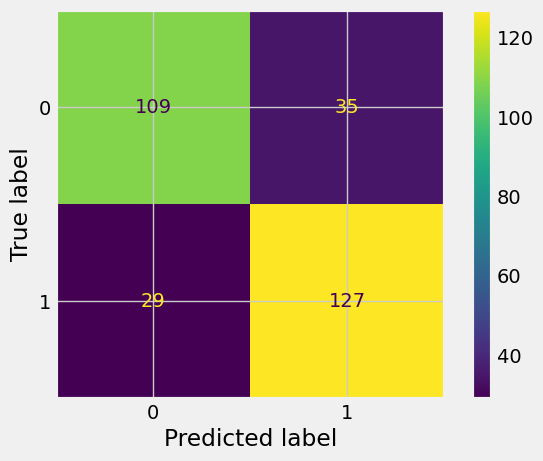

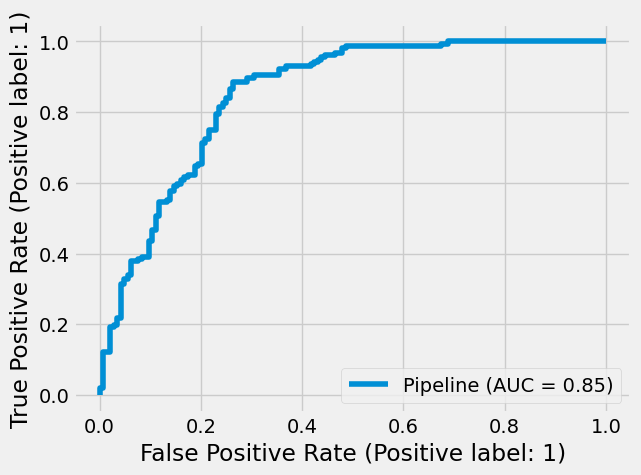

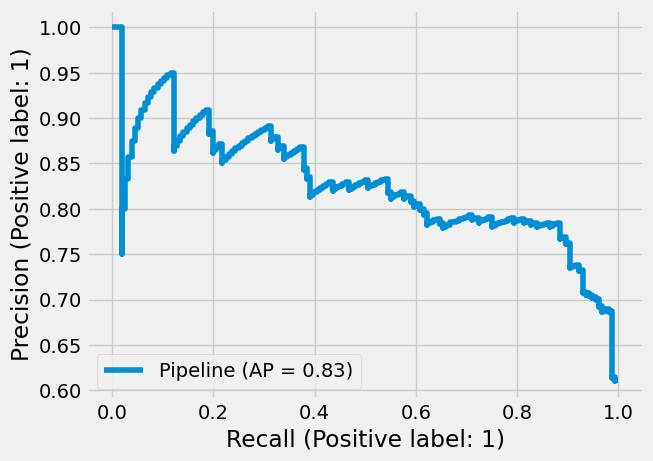

In [83]:
from sklearn.pipeline import Pipeline
sc=StandardScaler()
rfc_tunes=rfc_tuned
steps=[('scalar',sc),('rfc_tuned',rfc_tuned)]
pipeline=Pipeline(steps)
x_train,x_test,y_train,y_test=preprocess(df,label='Outcome')
pipeline.fit(x_train,y_train)
ypred=pipeline.predict(x_test)
plot_metrics(pipeline,x_test,y_test,'Pipeline')
print_metrics(y_test,ypred,'Pipeline')

In [79]:
print_metrics(y_test,y_pred,'Pipeline')

metrics for the model Pipeline
 
accuracy score 0.52
 
recall score 1.0
 
precision score 0.52
 
F1 score 0.6842105263157895
 
roc score 0.5
 
confuion matrix [[  0 144]
 [  0 156]]
classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.52      1.00      0.68       156

    accuracy                           0.52       300
   macro avg       0.26      0.50      0.34       300
weighted avg       0.27      0.52      0.36       300



In [84]:
#saver the pipeline as pickle file
import pickle
model=open("rfc.pickle",'wb')
pickle.dump(pipeline,model)
model.close()

# deploying the model as a streamlit file

In [98]:
%%writefile app.py
import streamlit as st
st.title("MEDICAL DIAGNOSIC WEB APP")
st.subheader('is the patient Diabetic?')
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

#step1: load the pickled model
model=open('rfc.pickle','rb')
clf=pickle.load(model)
model.close()
#step2: get the input from the frontend user
pregs=st.number_input('Pregnancies',0,170)
glucose=st.slider('Glucose',40,200,40)
BP=st.slider('BloodPressure',20,140,20) 
skin_thickness=st.slider('SkinThickness',7.0,99.0,7.0) 
insulin=st.slider('Insulin',14,850,14)
BMI=st.slider('BMI',18,67,18)
DPF=st.slider('DiabetesPedigreeFunction',0.05,2.5,0.05) 
age=st.slider('Age',20,90,20)

#step3: collect the fromend user input as model input data
data={
    'Pregnancies':pregs,'Glucose':glucose,
    'BloodPressure':BP,'SkinThickness':skin_thickness,
    "Insulin":insulin,'BMI':BMI,'DiabetesPedigreeFunction':DPF,
    'Age':age
}
input_data=pd.DataFrame([data])
#step 4 get the predictions and print the result
preds=clf.predict(input_data)[0]
if st.button("predict"):
    if preds==1:
        st.error("diabetic")
    if preds==0:
        st.success("non diabetic")

Overwriting app.py


In [87]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')